In [ ]:
!unzip craigslist_vehicles.csv.zip

# Time Series Model

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# load data with pandas 
cgdf = pd.read_csv('craigslist_vehicles.csv')

In [4]:
# View dataframe
cgdf.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [5]:
#check data types
cgdf.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
removal_date     object
dtype: object

In [7]:
cgdf.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,426880.000000,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,213439.500000,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,123229.785793,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,106719.750000,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,213439.500000,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,320159.250000,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,426879.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
## Posting date to datetime
cgdf['posting_date'] = pd.to_datetime(cgdf['posting_date'])

In [9]:
print(cgdf['region'].unique())

['abilene' 'akron / canton' 'albany' 'albuquerque' 'clovis / portales'
 'lehigh valley' 'altoona-johnstown' 'amarillo' 'southwest KS' 'ames'
 'anchorage / mat-su' 'annapolis' 'ann arbor' 'appleton-oshkosh-FDL'
 'asheville' 'ashtabula' 'athens' 'west virginia (old)'
 'huntington-ashland' 'atlanta' 'auburn' 'augusta' 'austin' 'bakersfield'
 'baltimore' 'baton rouge' 'battle creek' 'beaumont / port arthur'
 'bellingham' 'bemidji' 'bend' 'bowling green' 'birmingham' 'meridian'
 'southwest TX' 'billings' 'binghamton' 'bismarck' 'eastern montana'
 'new river valley' 'bloomington' 'bloomington-normal' 'boise' 'elko'
 'boone' 'boston' 'boulder' 'eastern CO' 'bozeman' 'brainerd'
 'brownsville' 'brunswick' 'buffalo' 'butte' 'cape cod / islands'
 'southern illinois' 'catskills' 'cedar rapids' 'central louisiana'
 'deep east texas' 'central michigan' 'heartland florida'
 'champaign urbana' 'cumberland valley' 'charleston' 'charlotte'
 'charlottesville' 'chattanooga' 'chautauqua' 'chicago' 'chico'


In [11]:
# check for unique vechicle types
print(cgdf['type'].unique())

[nan 'sedan' 'SUV' 'mini-van' 'pickup' 'truck' 'coupe' 'hatchback'
 'convertible' 'other' 'wagon' 'van' 'offroad' 'bus']


In [12]:
df = cgdf.set_index('posting_date')

#### Please choose your parameters to such as Region type and type to visualization trend below

In [16]:
# Filter by a specific region and vehicle type
filtered_df = cgdf[(cgdf['region'] == 'akron / canton') & (cgdf['type'] == 'SUV')]

In [17]:
# Group data by 'posting_date_dt' to get counts for each date
grouped_df = filtered_df.groupby('posting_date').size().reset_index(name='count')

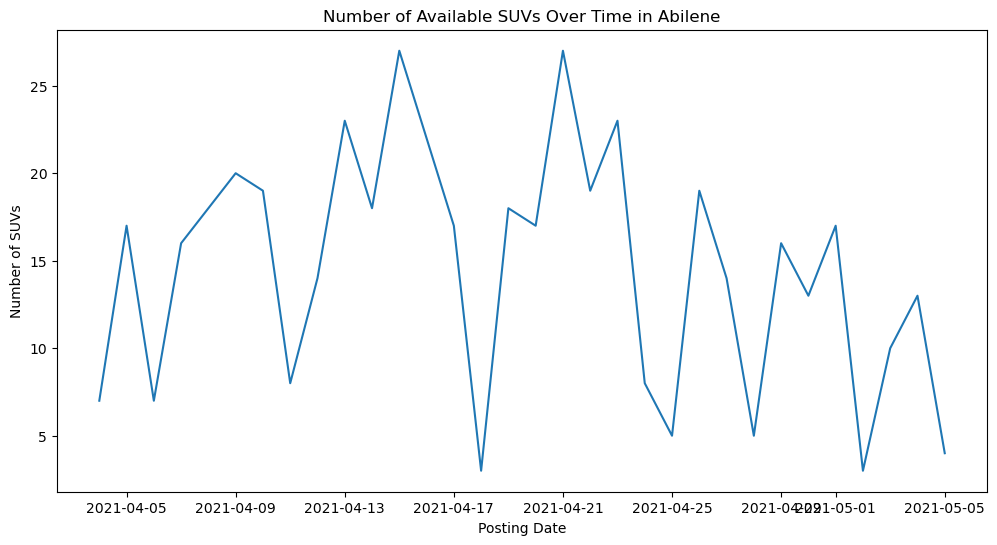

In [18]:
# time series chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['posting_date'], grouped_df['count'])
plt.title(f'Number of Available SUVs Over Time in Abilene')
plt.xlabel('Posting Date')
plt.ylabel('Number of SUVs')
plt.show()

In [19]:
# Set 'posting_date' as the index
grouped_df.set_index('posting_date', inplace=True)

In [20]:
# Perform seasonal decomposition
result = seasonal_decompose(grouped_df['count'], model='multiplicative', period=1)

Text(0.5, 1.0, 'Original Time Series')

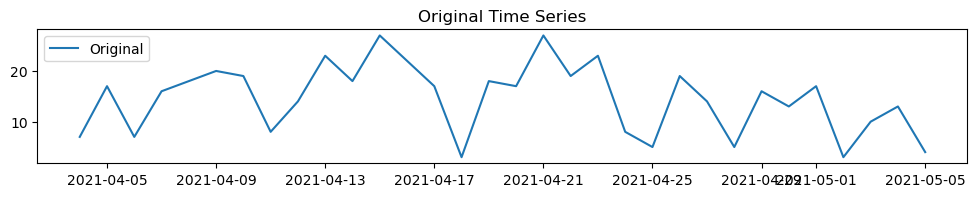

In [21]:
# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(grouped_df['count'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

Text(0.5, 1.0, 'Trend Component')

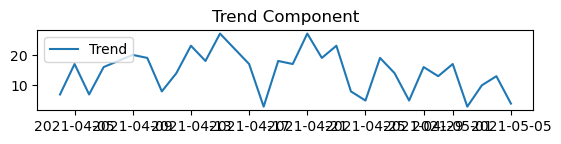

In [22]:
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

Text(0.5, 1.0, 'Seasonal Component')

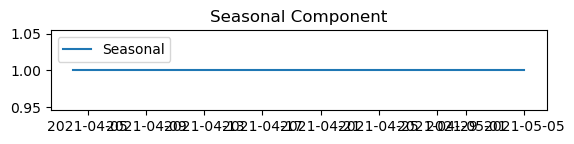

In [23]:
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

Text(0.5, 1.0, 'Residual Component')

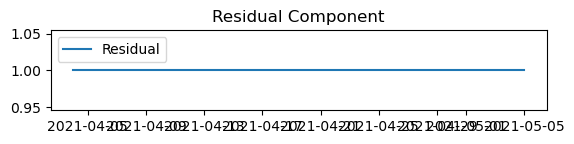

In [24]:
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

In [25]:
columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]

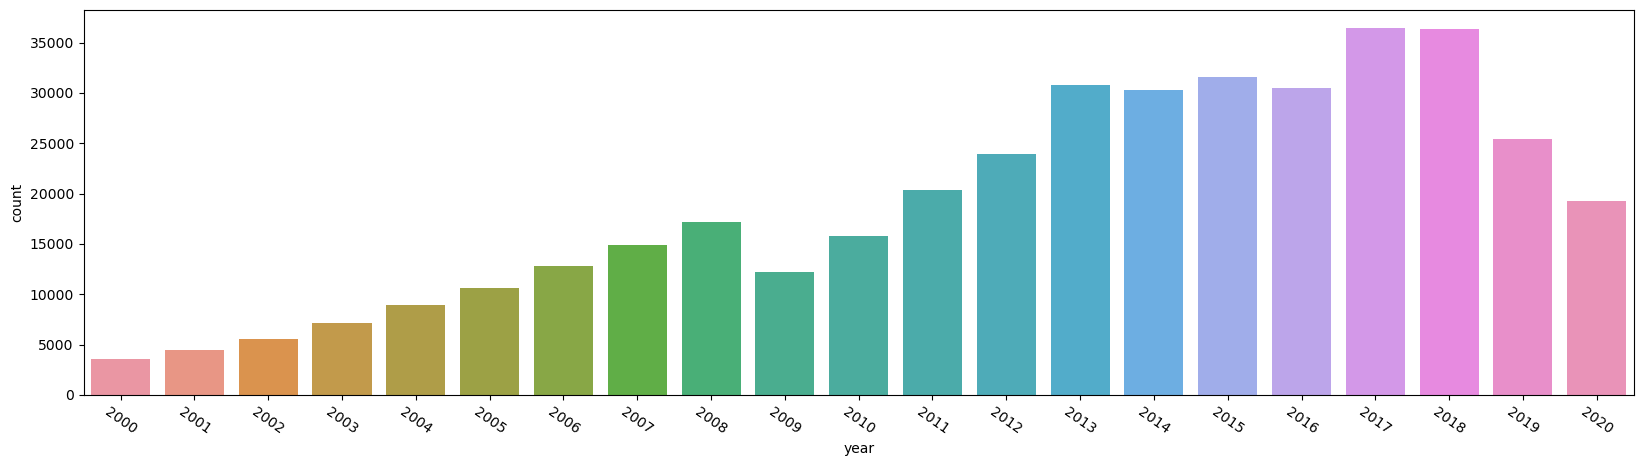

In [28]:
df_year = cgdf[(cgdf["year"]>1999) & (cgdf["year"]<2021)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

In [ ]:
cgdf['removal_date_dt'].isna().sum()